## A quick introduction to pandas using RNA-Seq Data

(*Not* to be taken as any kind of RNA-seq tutorial!)


Objectives:

* Read in a csv file to pandas
* Basic concept of a dataframe
* Summary data
* Operations on columns
* Plotting columns
* Row, column slicing
* Selecting rows based on a criterion
* New columns from calculations on others
* Mapping rows to generate a new column

First we'll import some needed packages - matplotlib for plotting, and the pandas package for analyzing tables of data.  We often use shorthands for these...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

We're going to follow [an actual RNA-Seq tutorial by Stephen Turner](http://www.gettinggeneticsdone.com/2015/12/tutorial-rna-seq-differential.html) and use data from the paper ["Differential analysis of gene regulation at transcript resolution with RNA-seq."](http://www.ncbi.nlm.nih.gov/pubmed/23222703) which has been conveniently put on figshare at https://figshare.com/articles/GSE37704_sample_data/1601975:

In [2]:
remote_gene_count_file = "https://ndownloader.figshare.com/files/3560183"
remote_metadata_file = "https://ndownloader.figshare.com/files/3560180"

Not all packages let you do this, but pandas lets you "load" files directly from a URL:

In [3]:
gene_data = pd.read_csv(remote_gene_count_file)
metadata = pd.read_csv(remote_metadata_file)

Let's take a look at the data:

In [4]:
gene_data.head()

,ensgene,length,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
0,ENSG00000186092,918,0,0,0,0,0,0
1,ENSG00000279928,718,0,0,0,0,0,0
2,ENSG00000279457,1982,23,28,29,29,28,46
3,ENSG00000278566,939,0,0,0,0,0,0
4,ENSG00000273547,939,0,0,0,0,0,0


In [5]:
metadata

,id,condition
0,SRR493366,control_sirna
1,SRR493367,control_sirna
2,SRR493368,control_sirna
3,SRR493369,hoxa1_kd
4,SRR493370,hoxa1_kd
5,SRR493371,hoxa1_kd


In [6]:
gene_data.describe()

,length,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
count,19808.000000,19808.000000,19808.000000,19808.000000,19808.000000,19808.000000,19808.000000
mean,4960.883128,645.977585,734.854301,929.766155,763.988540,854.072950,989.736622
std,3711.270948,4636.727936,5060.123061,6529.536291,5473.676418,6218.783364,6808.856693
min,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2393.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4143.000000,68.000000,75.000000,96.000000,73.000000,83.000000,94.000000
75%,6619.000000,455.000000,521.000000,655.000000,531.000000,594.250000,696.250000
max,118327.000000,389976.000000,425502.000000,542186.000000,411442.000000,476419.000000,506723.000000


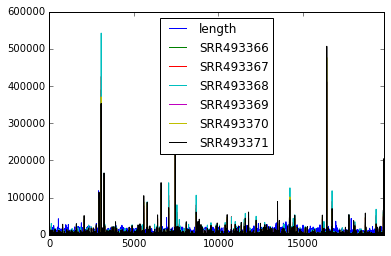

In [7]:
gene_data.plot()

It's actually going to be a bit of a pain having that ensemble gene name be a data column of our data,
since everything else is numeric: let's set it to be the rowname (or in pandas, the index, which is a
more general concept) rather than a data row:


In [8]:
gene_data = gene_data.set_index('ensgene')
gene_data.head()

,length,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,,
ENSG00000186092,918,0,0,0,0,0,0
ENSG00000279928,718,0,0,0,0,0,0
ENSG00000279457,1982,23,28,29,29,28,46
ENSG00000278566,939,0,0,0,0,0,0
ENSG00000273547,939,0,0,0,0,0,0


We can already see that a number of genes only have counts of zero across all samples, and that having the lengths in with the gene counts will make some steps more difficult; let's figure out how to:

* Get rid of rows with all counts zero
* Get rid of a column

First, let's understand how to operate with individual columns in a data frame:

Pandas data frames are just collections of same-length columns, each of which has a given type (float, int, etc).  Selecting a few of them is quite easy:

In [9]:
print(gene_data.columns)
print(list(gene_data.columns))

Index(['length', 'SRR493366', 'SRR493367', 'SRR493368', 'SRR493369',
       'SRR493370', 'SRR493371'],
      dtype='object')
['length', 'SRR493366', 'SRR493367', 'SRR493368', 'SRR493369', 'SRR493370', 'SRR493371']


In [10]:
gene_data['length'].head()

ensgene
ENSG00000186092     918
ENSG00000279928     718
ENSG00000279457    1982
ENSG00000278566     939
ENSG00000273547     939
Name: length, dtype: int64

In [11]:
print(gene_data[[1]].describe())
print(gene_data['length'].describe())
print(gene_data.length.describe())
print(gene_data[gene_data.columns[1]].describe())


           SRR493366
count   19808.000000
mean      645.977585
std      4636.727936
min         0.000000
25%         0.000000
50%        68.000000
75%       455.000000
max    389976.000000
count     19808.000000
mean       4960.883128
std        3711.270948
min          33.000000
25%        2393.750000
50%        4143.000000
75%        6619.000000
max      118327.000000
Name: length, dtype: float64
count     19808.000000
mean       4960.883128
std        3711.270948
min          33.000000
25%        2393.750000
50%        4143.000000
75%        6619.000000
max      118327.000000
Name: length, dtype: float64
count     19808.000000
mean        645.977585
std        4636.727936
min           0.000000
25%           0.000000
50%          68.000000
75%         455.000000
max      389976.000000
Name: SRR493366, dtype: float64


When would the above ways of selecting a column be more or less convenient?

In [12]:
gene_data['length'].max()

118327

In [13]:
gene_data[['length','SRR493366']].head()

,length,SRR493366
ensgene,,
ENSG00000186092,918,0
ENSG00000279928,718,0
ENSG00000279457,1982,23
ENSG00000278566,939,0
ENSG00000273547,939,0


Let's create a new data frame, `gene_count_data` that omits the length column. 

_Hands on.  There's a few ways to do this - the manual way..._

In [15]:
gene_count_data = gene_data[['SRR493366', 'SRR493367', 'SRR493368', 'SRR493369', 'SRR493370', 'SRR493371']]
gene_count_data.head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000186092,0,0,0,0,0,0
ENSG00000279928,0,0,0,0,0,0
ENSG00000279457,23,28,29,29,28,46
ENSG00000278566,0,0,0,0,0,0
ENSG00000273547,0,0,0,0,0,0


In [18]:
gene_count_data = gene_data[[1,2,3,4,5,6]]
gene_count_data.head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000186092,0,0,0,0,0,0
ENSG00000279928,0,0,0,0,0,0
ENSG00000279457,23,28,29,29,28,46
ENSG00000278566,0,0,0,0,0,0
ENSG00000273547,0,0,0,0,0,0


In [19]:
names = list(gene_data.columns)
gene_count_data = gene_data[names[1:]]
gene_count_data.head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000186092,0,0,0,0,0,0
ENSG00000279928,0,0,0,0,0,0
ENSG00000279457,23,28,29,29,28,46
ENSG00000278566,0,0,0,0,0,0
ENSG00000273547,0,0,0,0,0,0


In [20]:
gene_count_data = gene_data[gene_data.columns[1:]]
gene_count_data.head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000186092,0,0,0,0,0,0
ENSG00000279928,0,0,0,0,0,0
ENSG00000279457,23,28,29,29,28,46
ENSG00000278566,0,0,0,0,0,0
ENSG00000273547,0,0,0,0,0,0


Now that we've got the counts, we can look at plots a little more sensibly:

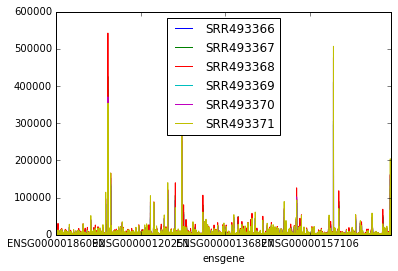

In [21]:
gene_count_data.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11820ac88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11bf162e8>]], dtype=object)

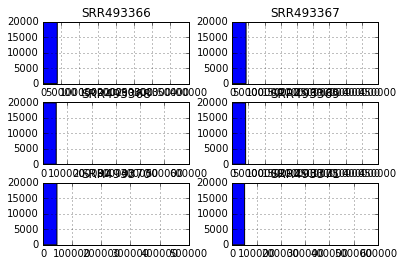

In [22]:
gene_count_data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ca0d6a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11cd01eb8>]], dtype=object)

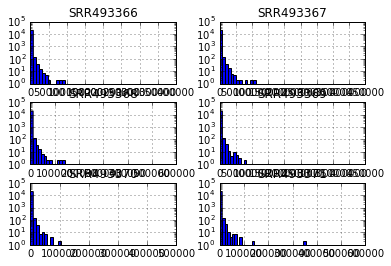

In [23]:
gene_count_data.hist(log=True, bins=50)

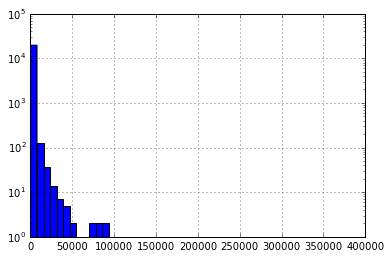

In [106]:
gene_count_data['SRR493366'].hist(log=True, bins=50)

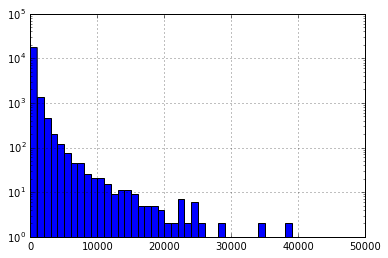

In [108]:
gene_count_data['SRR493366'].hist(log=True, bins=50, range=[0,50000])

Ok, now we want to skip rows that have all-zero (or maybe all-below-some-threshold) number of counts.  Let's play around with data frame rows.

When you index a data frame with a list or with a name, it selects columns; if you just use numbers, it selects rows:

In [24]:
gene_count_data[3:7]

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000278566,0,0,0,0,0,0
ENSG00000273547,0,0,0,0,0,0
ENSG00000187634,124,123,205,207,212,258
ENSG00000188976,1637,1831,2383,1226,1326,1504


In [25]:
gene_count_data[-5:]

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000277856,0,0,0,0,0,0
ENSG00000275063,0,0,0,0,0,0
ENSG00000271254,188,211,222,148,150,161
ENSG00000277475,0,0,0,0,0,0
ENSG00000268674,0,0,0,0,0,0


In [27]:
gene_count_data['SRR493366'][-5:]

ensgene
ENSG00000277856      0
ENSG00000275063      0
ENSG00000271254    188
ENSG00000277475      0
ENSG00000268674      0
Name: SRR493366, dtype: int64

You can select rows not just by numbers, but by whether a condition is true or false

In [29]:
awesome_gene_count=124
awesome_rows = (gene_count_data.SRR493366 == awesome_gene_count)
print(awesome_rows[:10])

ensgene
ENSG00000186092    False
ENSG00000279928    False
ENSG00000279457    False
ENSG00000278566    False
ENSG00000273547    False
ENSG00000187634     True
ENSG00000188976    False
ENSG00000187961    False
ENSG00000187583    False
ENSG00000187642    False
Name: SRR493366, dtype: bool


In [30]:
gene_count_data[awesome_rows]

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000187634,124,123,205,207,212,258
ENSG00000120334,124,213,216,124,126,154
ENSG00000182903,124,142,183,185,217,220
ENSG00000113638,124,139,177,152,192,223
ENSG00000253537,124,132,183,213,219,263
ENSG00000213654,124,130,178,139,154,172
ENSG00000026652,124,148,195,276,343,380
ENSG00000077063,124,162,179,249,235,284
ENSG00000105875,124,139,179,131,140,150


So this gives us a way to select our rows... we just need a way to figure out if all of the relevant columns pass some criterion.  This would work:

In [31]:
genes_with_counts = gene_count_data[(gene_count_data["SRR493366"] > 0) & (gene_count_data["SRR493367"] > 0) &
                                    (gene_count_data["SRR493368"] > 0) & (gene_count_data["SRR493369"] > 0) &
                                    (gene_count_data["SRR493370"] > 0) & (gene_count_data["SRR493371"] > 0)]
genes_with_counts.head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000279457,23,28,29,29,28,46
ENSG00000187634,124,123,205,207,212,258
ENSG00000188976,1637,1831,2383,1226,1326,1504
ENSG00000187961,120,153,180,236,255,357
ENSG00000187583,24,48,65,44,48,64


But it's sort of too terrible to contemplate (what if we had 30 samples?)

In [36]:
(gene_count_data > 0).head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000186092,False,False,False,False,False,False
ENSG00000279928,False,False,False,False,False,False
ENSG00000279457,True,True,True,True,True,True
ENSG00000278566,False,False,False,False,False,False
ENSG00000273547,False,False,False,False,False,False


In [40]:
(gene_count_data > 0).all()

SRR493366    False
SRR493367    False
SRR493368    False
SRR493369    False
SRR493370    False
SRR493371    False
dtype: bool

In [41]:
(gene_count_data > 0).all(axis=1)

ensgene
ENSG00000186092    False
ENSG00000279928    False
ENSG00000279457     True
ENSG00000278566    False
ENSG00000273547    False
ENSG00000187634     True
ENSG00000188976     True
ENSG00000187961     True
ENSG00000187583     True
ENSG00000187642     True
ENSG00000188290     True
ENSG00000187608     True
ENSG00000188157     True
ENSG00000237330    False
ENSG00000131591     True
ENSG00000162571    False
ENSG00000186891    False
ENSG00000186827    False
ENSG00000078808     True
ENSG00000176022     True
ENSG00000184163     True
ENSG00000160087     True
ENSG00000162572     True
ENSG00000131584     True
ENSG00000169972     True
ENSG00000127054     True
ENSG00000224051     True
ENSG00000169962     True
ENSG00000107404     True
ENSG00000162576     True
                   ...  
ENSG00000198727     True
ENSG00000274175    False
ENSG00000275869    False
ENSG00000273554    False
ENSG00000278782    False
ENSG00000277761    False
ENSG00000277836    False
ENSG00000277666    False
ENSG00000276760  

In [42]:
gene_count_data[(gene_count_data > 0).all(axis=1)]



,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000279457,23,28,29,29,28,46
ENSG00000187634,124,123,205,207,212,258
ENSG00000188976,1637,1831,2383,1226,1326,1504
ENSG00000187961,120,153,180,236,255,357
ENSG00000187583,24,48,65,44,48,64
ENSG00000187642,4,9,16,14,16,16
ENSG00000188290,31,34,57,172,172,223
ENSG00000187608,244,289,386,373,422,430
ENSG00000188157,6547,6758,9367,9853,10483,13037


In [43]:
genes_have_counts_data = gene_count_data[(gene_count_data > 0).all(axis=1)]
genes_have_counts_data.head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000279457,23,28,29,29,28,46
ENSG00000187634,124,123,205,207,212,258
ENSG00000188976,1637,1831,2383,1226,1326,1504
ENSG00000187961,120,153,180,236,255,357
ENSG00000187583,24,48,65,44,48,64


In [44]:
genes_have_counts_data.describe()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
count,13282.000000,13282.000000,13282.000000,13282.000000,13282.000000,13282.000000
mean,963.230086,1095.745897,1386.380816,1139.083798,1273.414094,1475.642147
std,5635.423540,6147.452412,7934.217618,6652.540821,7559.278842,8271.903228
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,65.000000,72.000000,91.000000,70.000000,79.000000,91.000000
50%,271.000000,308.500000,389.000000,307.000000,345.000000,399.500000
75%,749.000000,858.000000,1077.000000,908.000000,1004.750000,1189.000000
max,389976.000000,425502.000000,542186.000000,411442.000000,476419.000000,506723.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11da00cf8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e32b6a0>]], dtype=object)

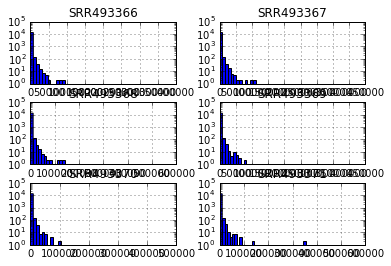

In [45]:
genes_have_counts_data.hist(log=True, bins=50)

_Hands on - create a function which takes such a raw gene dataframe, applies a count threshold, and gets rid of the lengths_

In [54]:
def gene_counts_above_threshold(dataframe, threshold=0):
    """
    Returns a data frame from a given dataframe without any column named 'length', and 
    with rows such that every column is above threshold. 
    
    dataframe: an input pandas dataframe
    threshold: an threshold that all int64 columns must _exceed_ for the row to be kept
    returns a pandas dataframe with the column named 'length' stripped, 
             and with rows such that all int64 columns are strictly above threshold
    """
    no_length_column = dataframe[dataframe.columns.difference(["length"])]
    
    above_threshold = no_length_column[(no_length_column > threshold).all(axis=1)]
    return above_threshold

In [50]:
help(gene_counts_above_threshold)

Help on function gene_counts_above_threshold in module __main__:

gene_counts_above_threshold(dataframe, threshold=0)
    Returns a data frame from a given dataframe without any column named 'length', and 
    with rows such that every column is above threshold. 
    
    dataframe: an input pandas dataframe
    threshold: an threshold that all int64 columns must _exceed_ for the row to be kept
    returns a pandas dataframe with the column named 'length' stripped, 
             and with rows such that all int64 columns are strictly above threshold



In [163]:
genes_have_counts_data = gene_counts_above_threshold(gene_data, 5)

In [164]:
genes_have_counts_data.head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000279457,23,28,29,29,28,46
ENSG00000187634,124,123,205,207,212,258
ENSG00000188976,1637,1831,2383,1226,1326,1504
ENSG00000187961,120,153,180,236,255,357
ENSG00000187583,24,48,65,44,48,64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d511d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12dc08860>]], dtype=object)

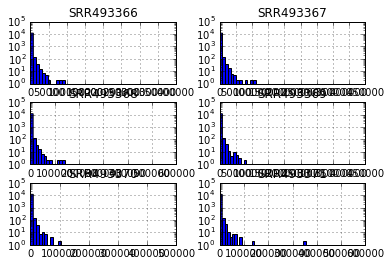

In [166]:
genes_have_counts_data.hist(log=True, bins=50)

Ok, so now we have the rows and columns we want, and we're ready to start doing some very crude analyses.
However, we need to scale the data across samples; we might just have more data overall from one sample
so that the counts would seem elevated compared to another.  A simple but crude way to do that scaling is
to scale by some average number of counts:

In [167]:
genes_have_counts_data.mean()

SRR493366    1068.233584
SRR493367    1215.196324
SRR493368    1537.521637
SRR493369    1263.169758
SRR493370    1412.163743
SRR493371    1636.372932
dtype: float64

In [168]:
scaled_data = genes_have_counts_data / genes_have_counts_data.mean()

In [169]:
scaled_data.head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
ensgene,,,,,,
ENSG00000279457,0.021531,0.023042,0.018862,0.022958,0.019828,0.028111
ENSG00000187634,0.116079,0.101218,0.133331,0.163873,0.150124,0.157666
ENSG00000188976,1.532436,1.506752,1.549897,0.970574,0.938985,0.919106
ENSG00000187961,0.112335,0.125906,0.117072,0.186832,0.180574,0.218165
ENSG00000187583,0.022467,0.039500,0.042276,0.034833,0.033990,0.039111


In [170]:
scaled_data.describe()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
count,11970.000000,11970.000000,11970.000000,11970.000000,11970.000000,11970.000000
mean,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,5.548273,5.319684,5.426867,5.538878,5.630062,5.315697
min,0.005617,0.004937,0.003902,0.004750,0.004249,0.003667
25%,0.106718,0.105333,0.105364,0.097374,0.098431,0.098388
50%,0.312666,0.312707,0.309914,0.303205,0.304497,0.306165
75%,0.776750,0.787527,0.777225,0.805117,0.807095,0.813995
max,365.066223,350.150829,352.636338,325.721858,337.368101,309.662296


Scaling by mean is actually a pretty bad idea, because a few highly-expressed genes can badly skew the mean.
A more robust method is to scale by the median - do that now

In [171]:
scaled_data = genes_have_counts_data / genes_have_counts_data.median()
print(scaled_data.head())
print(scaled_data.describe())

                 SRR493366  SRR493367  SRR493368  SRR493369  SRR493370  \
ensgene                                                                  
ENSG00000279457   0.068862   0.073684   0.060860   0.075718   0.065116   
ENSG00000187634   0.371257   0.323684   0.430220   0.540470   0.493023   
ENSG00000188976   4.901198   4.818421   5.001049   3.201044   3.083721   
ENSG00000187961   0.359281   0.402632   0.377754   0.616188   0.593023   
ENSG00000187583   0.071856   0.126316   0.136411   0.114883   0.111628   

                 SRR493371  
ensgene                     
ENSG00000279457   0.091816  
ENSG00000187634   0.514970  
ENSG00000188976   3.001996  
ENSG00000187961   0.712575  
ENSG00000187583   0.127745  
          SRR493366     SRR493367     SRR493368     SRR493369     SRR493370  \
count  11970.000000  11970.000000  11970.000000  11970.000000  11970.000000   
mean       3.198304      3.197885      3.226698      3.298093      3.284102   
std       17.745064     17.011737     17.

Let's do a little sanity check, and use a PCA to see if the samples we expect to be most similar in gene counts
in fact are - we expect the control samples (first three) to cluster together, and the treatment samples (last three)
to cluster together

[[-20.21252387   1.72118593]
 [-21.36436765  -1.61000477]
 [-21.12586582  -0.7095232 ]
 [ 20.76081705   0.50899454]
 [ 17.32916166   3.75675258]
 [ 24.61277862  -3.66740508]]


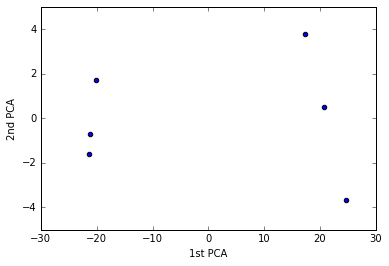

In [172]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA(n_components=2).fit_transform(scale(scaled_data).T)
print(pca)
plt.scatter(pca[:,0], pca[:,1])
plt.xlabel("1st PCA")
plt.ylabel("2nd PCA")

So this seems promising.  Now let's generate an MA plot - mean expression of the gene across all samples, 
_vs_ the change in expression, all log2 scaled

In [173]:
np.log2(scaled_data.mean(axis=1))[:5]

ensgene
ENSG00000279457   -3.782372
ENSG00000187634   -1.166165
ENSG00000188976    2.000447
ENSG00000187961   -0.970746
ENSG00000187583   -3.122725
dtype: float64

In [174]:
A_untreated = np.log2(scaled_data[scaled_data.columns[0:3]].mean(axis=1))
A_treated = np.log2(scaled_data[scaled_data.columns[3:7]].mean(axis=1))
A = 1./2. *(A_untreated + A_treated)
M = A_treated - A_untreated

print(A_untreated[:5])
print(A_treated[:5])
print(M[:5])

ensgene
ENSG00000279457   -3.882522
ENSG00000187634   -1.414830
ENSG00000188976    2.294809
ENSG00000187961   -1.396350
ENSG00000187583   -3.164525
dtype: float64
ensgene
ENSG00000279457   -3.688725
ENSG00000187634   -0.954125
ENSG00000188976    1.630213
ENSG00000187961   -0.642515
ENSG00000187583   -3.082103
dtype: float64
ensgene
ENSG00000279457    0.193796
ENSG00000187634    0.460704
ENSG00000188976   -0.664596
ENSG00000187961    0.753835
ENSG00000187583    0.082422
dtype: float64


In [175]:
scaled_data['M'] = M
scaled_data['A'] = A

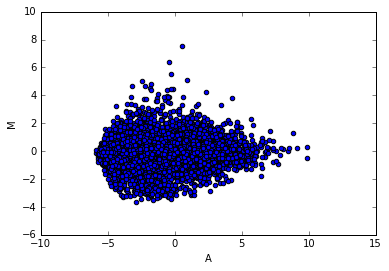

In [176]:
plt.scatter(scaled_data.A, scaled_data.M)
plt.xlabel('A')
plt.ylabel('M')

Now we're going to make a volcano plot: p-value of change in expression vs change in expression

We'll calculate the p-values _very_ crudely by doing a 2-sided independent t-test of the scaled counts in the 
control and treatment samples.   This will require looking at the data a little differently - we're going to
be processing subsets of columns for each row.

In [177]:
from scipy.stats import ttest_ind

In [178]:
onerow = scaled_data[0:1]
onerow.values[0]

array([ 0.06886228,  0.07368421,  0.06086044,  0.07571802,  0.06511628,
        0.09181637,  0.19379648, -3.78562355])

In [179]:
onerow.values[0][0:3]

array([ 0.06886228,  0.07368421,  0.06086044])

In [180]:
ttest_ind(onerow.values[0][0:3], onerow.values[0][3:6])

Ttest_indResult(statistic=-1.131398746481594, pvalue=0.32112132570758473)

In [181]:
ttest_ind(onerow.values[0][0:3], onerow.values[0][3:7]).pvalue

0.3196217469549546

In [182]:
def gene_pvalue(dataframe_row):
    control = dataframe_row[0:3]
    treatment = dataframe_row[3:7]
    return ttest_ind(control, treatment).pvalue

In [183]:
gene_pvalue(onerow.values[0])

0.3196217469549546

In [184]:
foo = scaled_data.apply(gene_pvalue, axis=1)

Hands on: make a "p_value" column in the scaled_data dataframe, and plot M along x axis and -log10 p_value along y axis

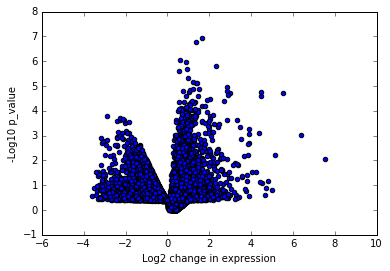

In [185]:
scaled_data['p_value'] = scaled_data.apply(gene_pvalue, axis=1)
plt.scatter(scaled_data['M'], -np.log10(scaled_data['p_value']))
plt.xlabel('Log2 change in expression')
plt.ylabel('-Log10 p_value')

In [190]:
sorted_data = scaled_data.sort_values('p_value')

In [192]:
sorted_data.head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371,M,A,p_value
ensgene,,,,,,,,,
ENSG00000112406,0.556886,0.473684,0.528856,1.629243,1.660465,1.694611,1.676381,-0.105756,1.184934e-07
ENSG00000127951,0.544910,0.513158,0.526758,1.378590,1.302326,1.351297,1.347248,-0.247014,1.751737e-07
ENSG00000257704,0.401198,0.407895,0.407135,0.603133,0.623256,0.628743,0.609108,-0.997995,9.273077e-07
ENSG00000198169,0.476048,0.523684,0.482686,0.911227,0.913953,0.920160,0.889032,-0.572494,1.095832e-06
ENSG00000114796,0.532934,0.397368,0.503673,2.357702,2.281395,2.528942,2.321559,0.095837,1.595045e-06


Now you could start applying the appropriate multiple-hypothesis testing corrections to see if any of these changes were significant.  A Bonferroni correction would look like

In [199]:
sorted_data['bonferroni'] = sorted_data['p_value'] * sorted_data.shape[0]

In [200]:
sorted_data.head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371,M,A,p_value,bonferroni
ensgene,,,,,,,,,,
ENSG00000112406,0.556886,0.473684,0.528856,1.629243,1.660465,1.694611,1.676381,-0.105756,1.184934e-07,0.001418
ENSG00000127951,0.544910,0.513158,0.526758,1.378590,1.302326,1.351297,1.347248,-0.247014,1.751737e-07,0.002097
ENSG00000257704,0.401198,0.407895,0.407135,0.603133,0.623256,0.628743,0.609108,-0.997995,9.273077e-07,0.011100
ENSG00000198169,0.476048,0.523684,0.482686,0.911227,0.913953,0.920160,0.889032,-0.572494,1.095832e-06,0.013117
ENSG00000114796,0.532934,0.397368,0.503673,2.357702,2.281395,2.528942,2.321559,0.095837,1.595045e-06,0.019093


## Advanced - simple aggregation 

Let's say there was information about more than just individual genes: there was also families of genes we
were interested in:

In [234]:
genes_with_families = genes_have_counts_data

def phony_family_from_name(gene_name):
    return int(gene_name[-1])

families = list(map(phony_family_from_name, genes_have_counts_data.index))
genes_with_families['family'] = families

In [235]:
genes_with_families.head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371,family
ensgene,,,,,,,
ENSG00000279457,23,28,29,29,28,46,7
ENSG00000187634,124,123,205,207,212,258,4
ENSG00000188976,1637,1831,2383,1226,1326,1504,6
ENSG00000187961,120,153,180,236,255,357,1
ENSG00000187583,24,48,65,44,48,64,3


We can do simple things like find out how many are in each family:

In [236]:
genes_with_families['family'].value_counts()

4    1261
1    1241
6    1235
3    1228
2    1200
5    1184
0    1175
8    1159
9    1157
7    1130
Name: family, dtype: int64

Now we can start aggregating data by family:

In [245]:
family_data = genes_with_families.groupby('family').aggregate('mean')

In [246]:
family_data.head()

,SRR493366,SRR493367,SRR493368,SRR493369,SRR493370,SRR493371
family,,,,,,
0,948.428085,1083.331064,1368.943830,1088.706383,1222.605957,1410.660426
1,1282.382756,1439.471394,1833.764706,1740.912168,1941.875907,2246.020951
2,1104.530833,1258.074167,1578.275000,1370.426667,1544.802500,1768.760000
3,943.318404,1081.236156,1363.280945,1118.091205,1252.069218,1452.158795
4,1406.930214,1594.706582,2024.383822,1492.633624,1688.310071,1909.273592


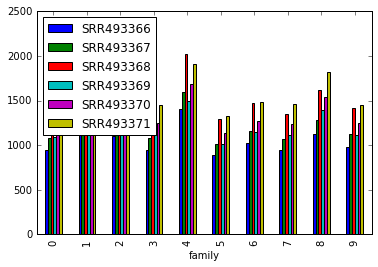

In [247]:
family_data.plot(kind='bar')